# Libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
from sklearn.metrics import(precision_score, recall_score, confusion_matrix, classification_report, accuracy_score)
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Dataset

In [77]:
# Run this cell if you are using Google Colab
from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/Project/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# If you are using Google Colab no need to run this cell.
df = pd.read_csv('Dataset/mushrooms.csv')
df.head()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [79]:
df.shape

(8124, 23)

### Target

In [ ]:
target = 'class'

### Bar Chart

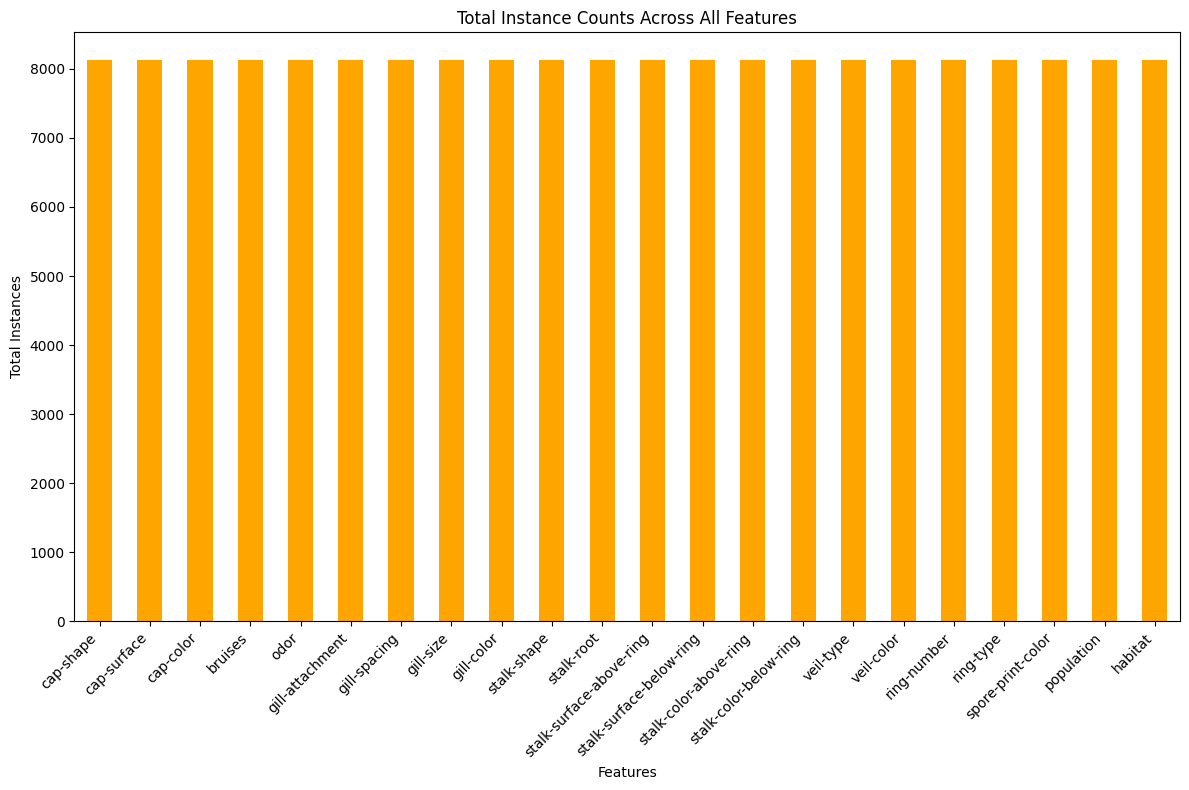

In [80]:
totalCounts = df.loc[:, df.columns != target].count()

# Plotting the bar chart for total instance counts across all columns except the target
plt.figure(figsize=(12, 8))
totalCounts.plot(kind='bar', color='orange')
plt.title('Total Instance Counts Across All Features')
plt.xlabel('Features')
plt.ylabel('Total Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Class Distribution

In [82]:
# unique class & their counts in the dataset
classCounts = df[target].value_counts()
print(classCounts)

class
e    4208
p    3916
Name: count, dtype: int64


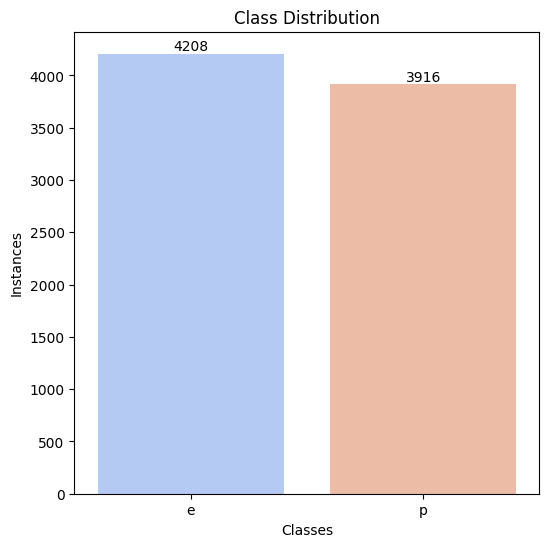

In [83]:
plt.figure(figsize=(6,6))
sns.barplot(x = classCounts.index, y = classCounts.values, palette = 'coolwarm', hue = classCounts.index, legend = False)

plt.xlabel('Classes')
plt.ylabel('Instances')
plt.title('Class Distribution')

for i, c in enumerate(classCounts.values):
    plt.text(i, c, str(c), ha = 'center', va = 'bottom')

plt.show()

# Categorical to Numerical

In [84]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert all categorical columns to numerical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Correlation

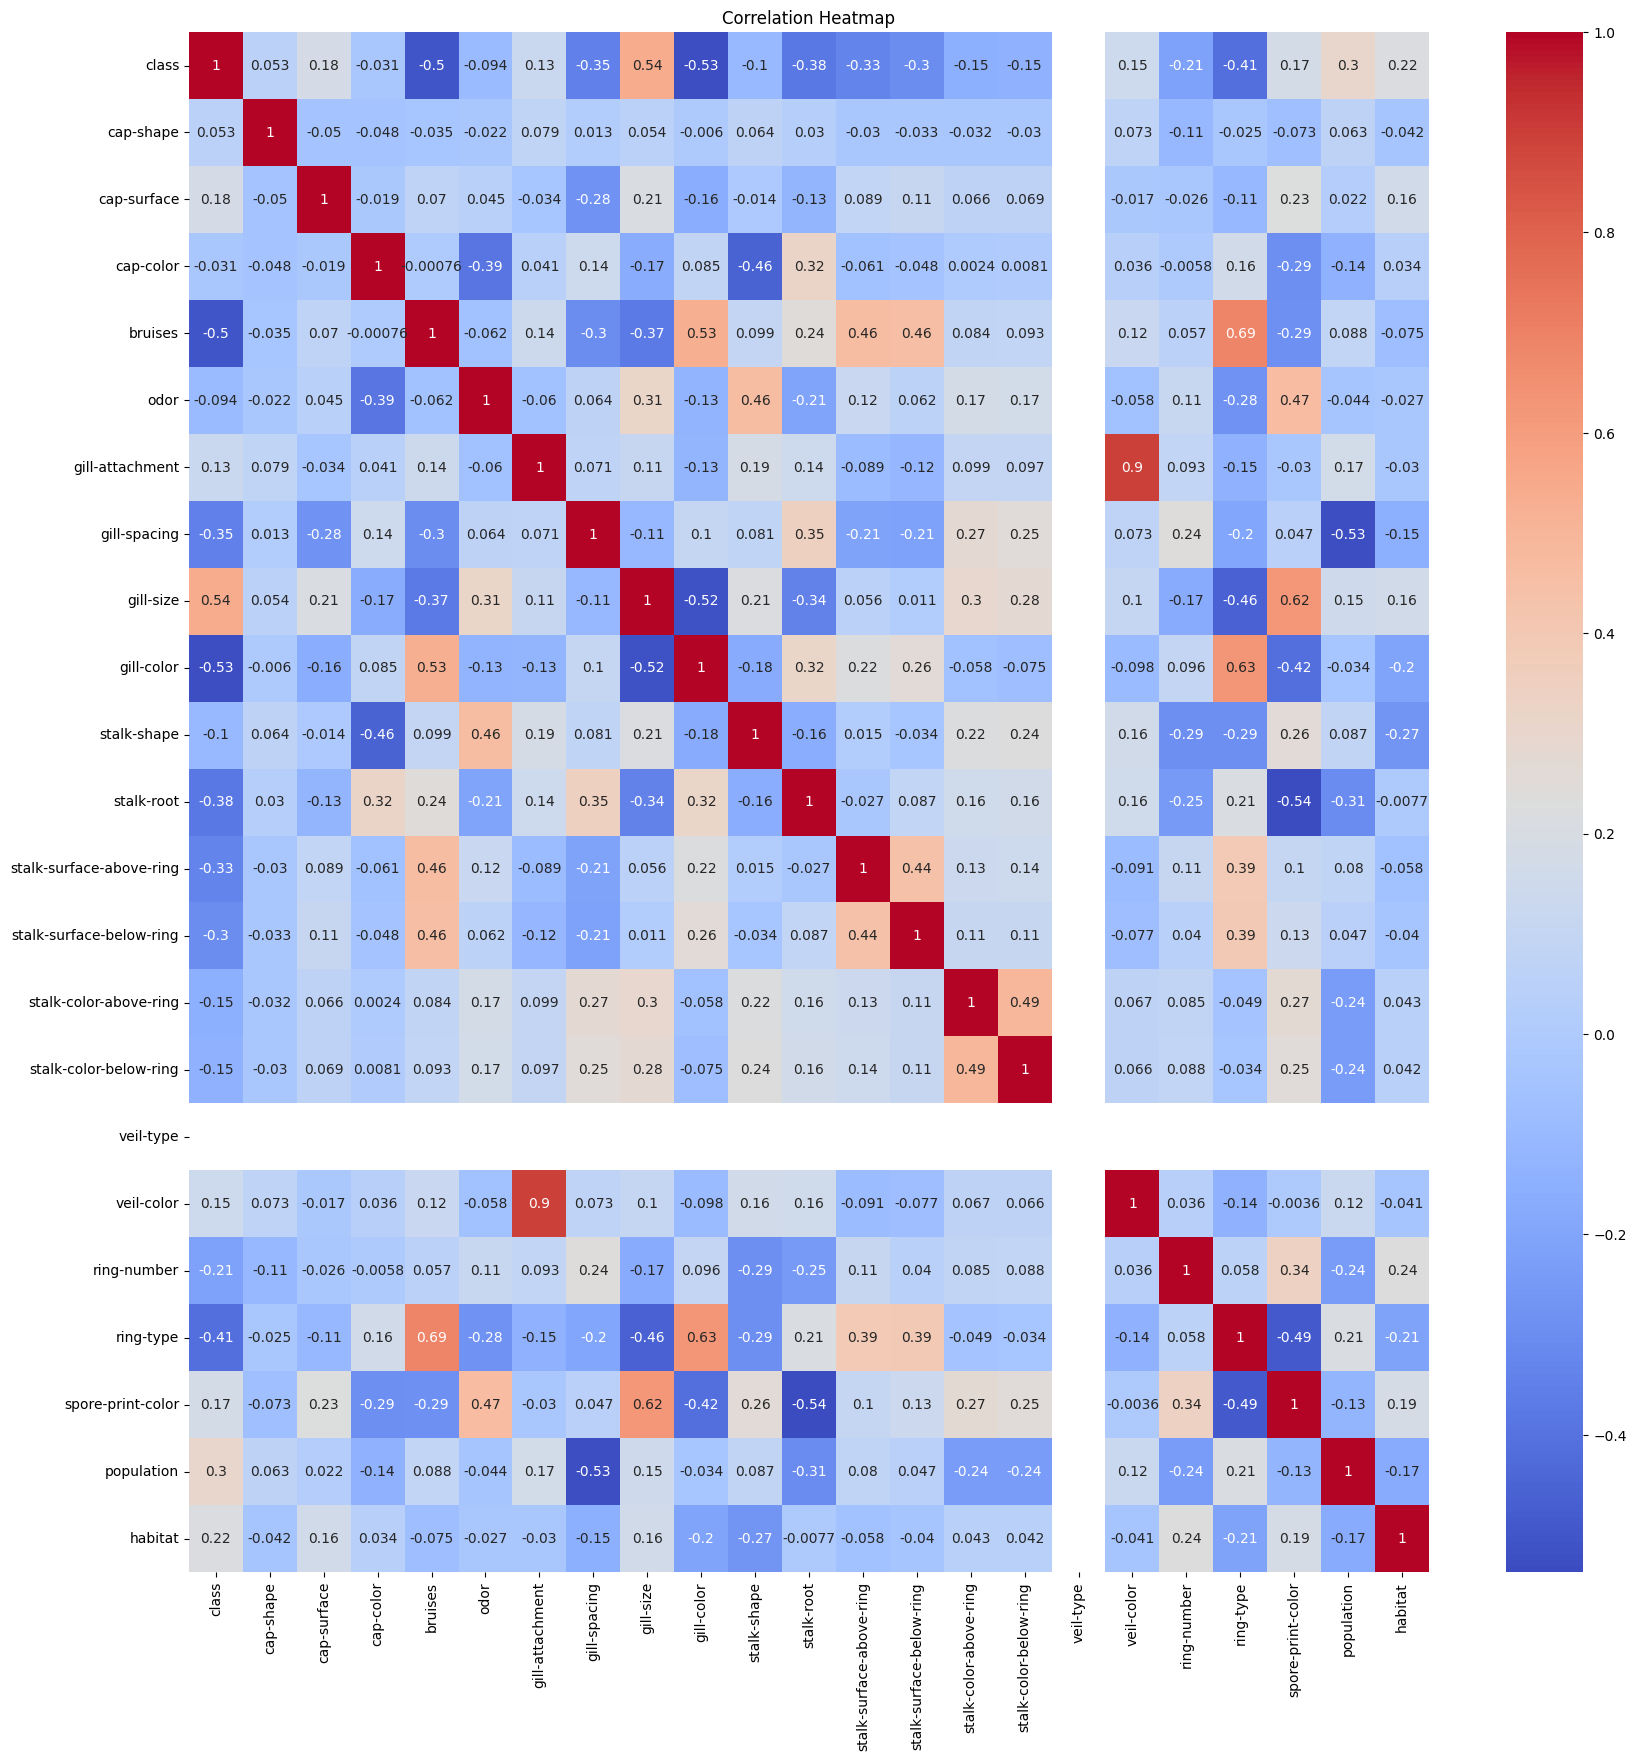

In [85]:
corrMatrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing

In [86]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [87]:
# Dropping veil-type column as it's only related to p class
df.drop(['veil-type'], axis=1, inplace=True)

# Drop NULL value rows
df = df.dropna(axis=0, how='any')

print(df.shape)

(8124, 22)


In [88]:
x = df.drop(target, axis=1)
y = df[target]

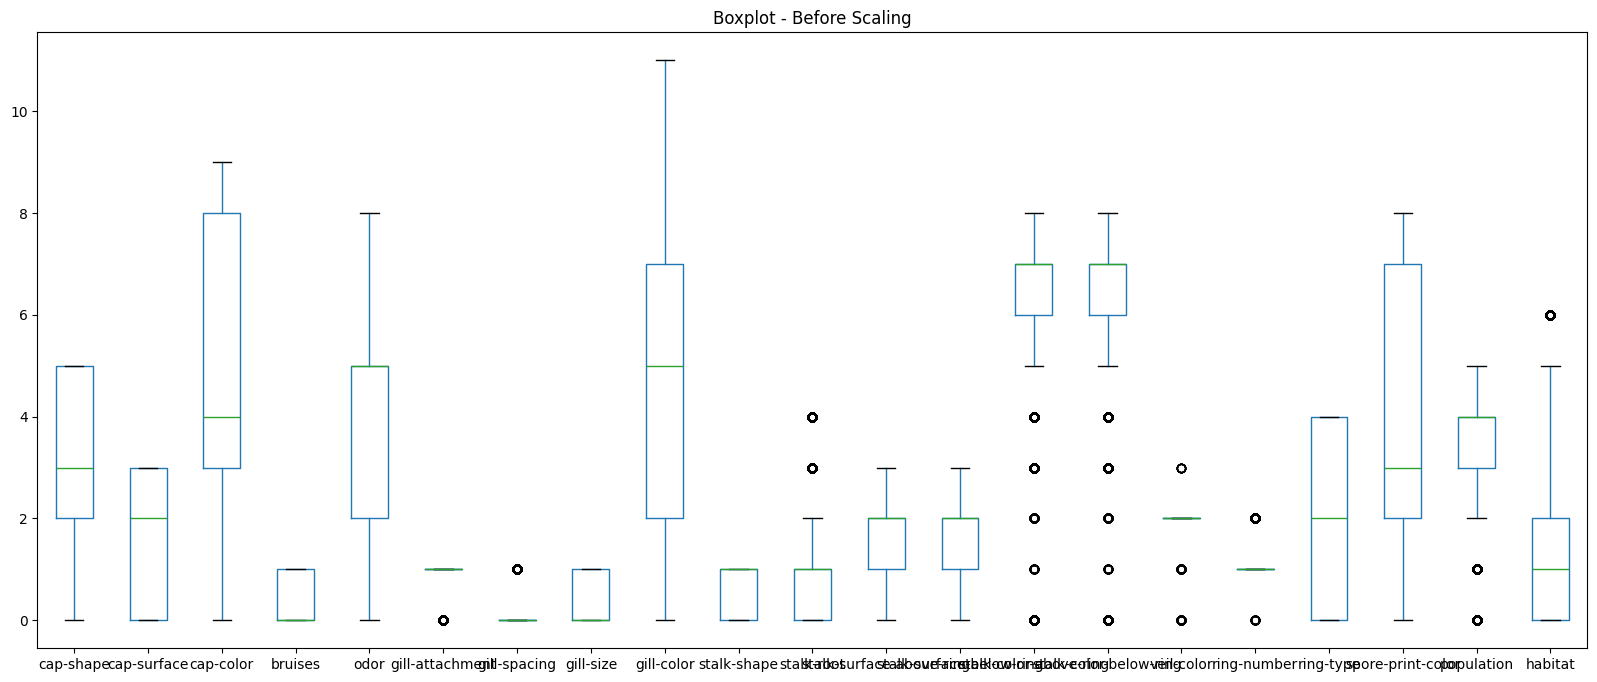

In [89]:
# Boxplot to visualize the distribution of multiple columns in the DataFrame
plt.figure(figsize=(20, 8))
x.boxplot(grid=False)
plt.title('Boxplot - Before Scaling')
plt.show()

In [90]:
# Scaling
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns, index=x.index)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


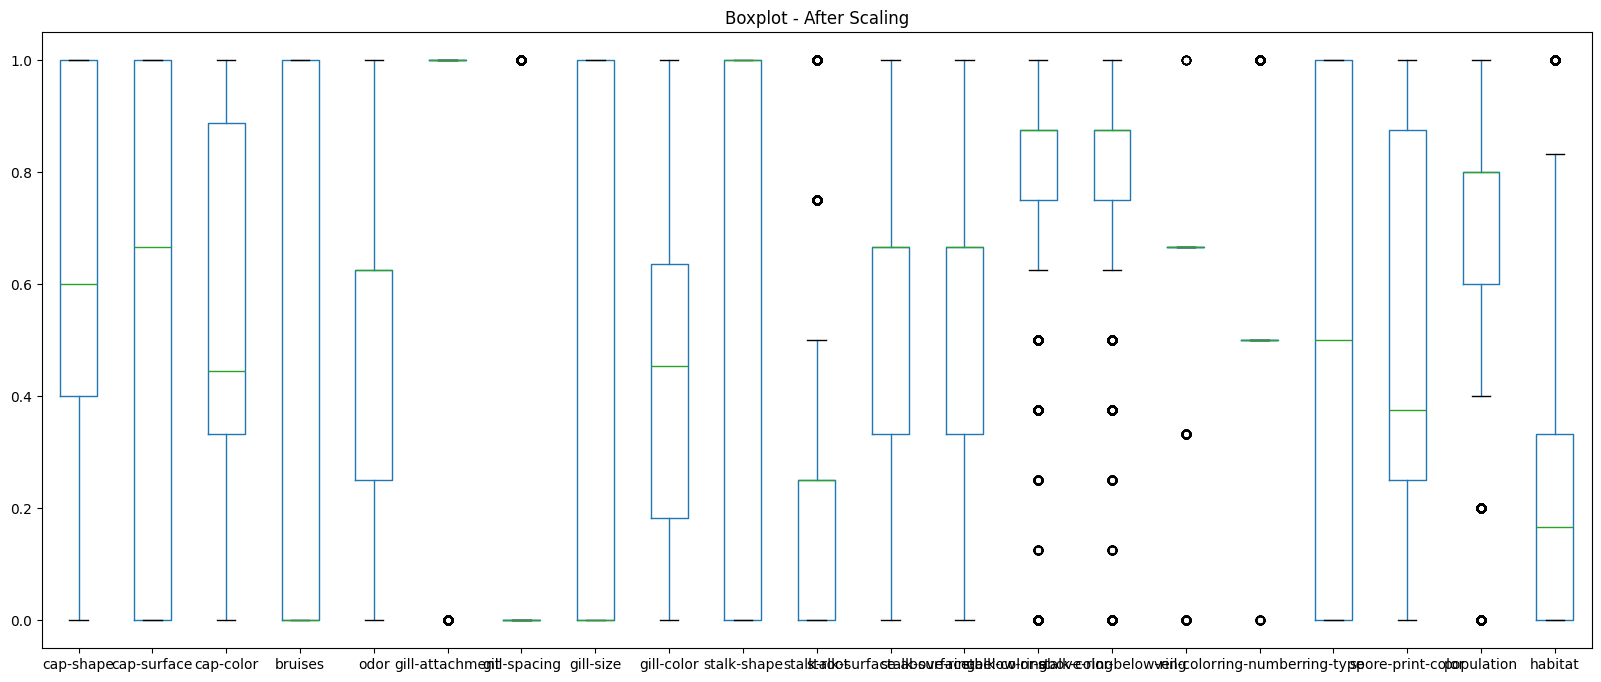

In [91]:
# Boxplot to visualize the distribution of multiple columns in the DataFrame
plt.figure(figsize=(20, 8))
x.boxplot(grid=False)
plt.title('Boxplot - After Scaling')
plt.show()

# Data Splitting, Training and Testing

In [92]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=40, stratify=y)

In [93]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5686 entries, 7649 to 5519
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap-shape                 5686 non-null   float64
 1   cap-surface               5686 non-null   float64
 2   cap-color                 5686 non-null   float64
 3   bruises                   5686 non-null   float64
 4   odor                      5686 non-null   float64
 5   gill-attachment           5686 non-null   float64
 6   gill-spacing              5686 non-null   float64
 7   gill-size                 5686 non-null   float64
 8   gill-color                5686 non-null   float64
 9   stalk-shape               5686 non-null   float64
 10  stalk-root                5686 non-null   float64
 11  stalk-surface-above-ring  5686 non-null   float64
 12  stalk-surface-below-ring  5686 non-null   float64
 13  stalk-color-above-ring    5686 non-null   float64
 14  stalk-colo

In [94]:
xTest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 459 to 1037
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap-shape                 2438 non-null   float64
 1   cap-surface               2438 non-null   float64
 2   cap-color                 2438 non-null   float64
 3   bruises                   2438 non-null   float64
 4   odor                      2438 non-null   float64
 5   gill-attachment           2438 non-null   float64
 6   gill-spacing              2438 non-null   float64
 7   gill-size                 2438 non-null   float64
 8   gill-color                2438 non-null   float64
 9   stalk-shape               2438 non-null   float64
 10  stalk-root                2438 non-null   float64
 11  stalk-surface-above-ring  2438 non-null   float64
 12  stalk-surface-below-ring  2438 non-null   float64
 13  stalk-color-above-ring    2438 non-null   float64
 14  stalk-color

In [95]:
yTrain.info()

<class 'pandas.core.series.Series'>
Index: 5686 entries, 7649 to 5519
Series name: class
Non-Null Count  Dtype
--------------  -----
5686 non-null   int64
dtypes: int64(1)
memory usage: 88.8 KB


In [96]:
yTest.info()

<class 'pandas.core.series.Series'>
Index: 2438 entries, 459 to 1037
Series name: class
Non-Null Count  Dtype
--------------  -----
2438 non-null   int64
dtypes: int64(1)
memory usage: 38.1 KB


# Models

## Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(xTrain, yTrain)

ypredDT = modelDT.predict(xTest)

# Accuracy
accuracyDT = round(accuracy_score(yTest, ypredDT) * 100, 2)

print(accuracyDT)

100.0


## Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(xTrain, yTrain)

ypredRF = modelRF.predict(xTest)

# accuracy
accuracyRF = round(accuracy_score(yTest, ypredRF)*100, 2)

print(accuracyRF)

100.0


## KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
modelKNN = KNeighborsClassifier(n_neighbors=k)
modelKNN.fit(xTrain, yTrain)

# predict
ypredKNN = modelKNN.predict(xTest)

# accuracy
accuracyKNN = round(accuracy_score(yTest, ypredKNN) * 100, 2)
print(accuracyKNN)

100.0


# Model Comparison

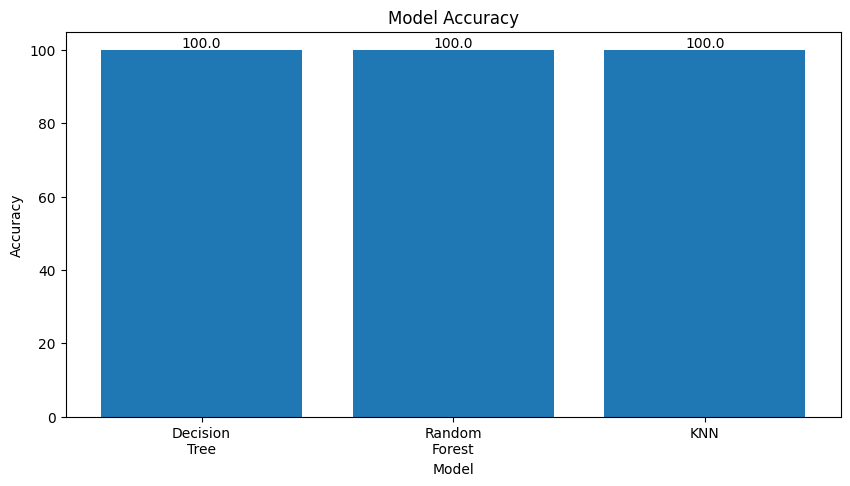

In [100]:
models = [ 'Decision\nTree', 'Random\nForest', 'KNN' ]
accuracies = [ accuracyDT, accuracyRF, accuracyKNN ]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, tick_label=models)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for i in range(len(models)):
    plt.text(models[i], accuracies[i], str(accuracies[i]), ha='center', va='bottom')

plt.show()

# Precision and Recall Comparison

In [101]:
# List of models and their predictions
models = [
    ('Decision Tree', ypredDT),
    ('Random Forest', ypredRF),
    ('KNN', ypredKNN)
]

# result matrix
matrix = []

for model, yPred in models:
    precision = precision_score(yTest, yPred, average='weighted')
    recall = recall_score(yTest, yPred, average='weighted')

    matrix.append({'Model': model, 'Precision': precision, 'Recall': recall})

# Convert the list of dictionaries to a DataFrame
matrixDF = pd.DataFrame(matrix)
print(matrixDF)

           Model  Precision  Recall
0  Decision Tree        1.0     1.0
1  Random Forest        1.0     1.0
2            KNN        1.0     1.0


# Confusion Matrix

## Decision Tree

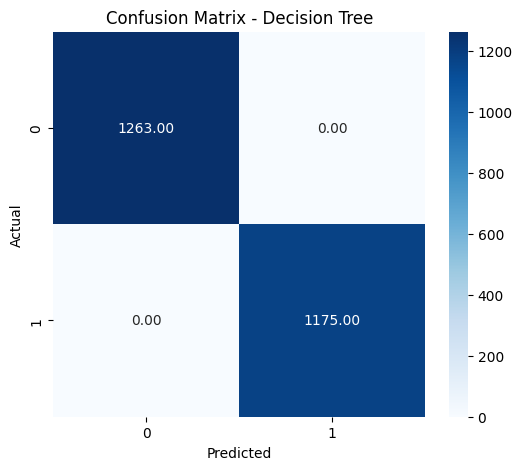

In [102]:
cmDT = confusion_matrix(yTest, ypredDT)

# Plotting the confusion matrix for Decision Tree
plt.figure(figsize=(6, 5))
sns.heatmap(cmDT, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

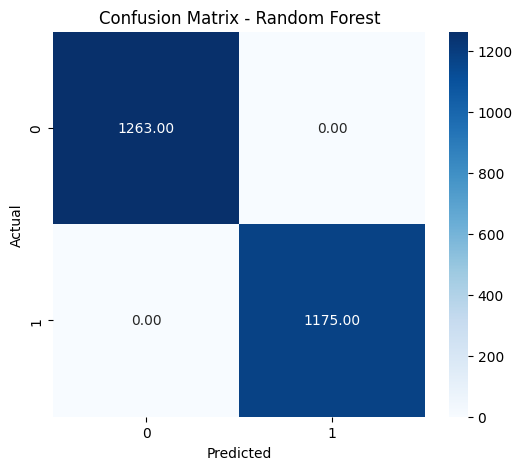

In [103]:
cmRF = confusion_matrix(yTest, ypredRF)

# Plotting the confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(cmRF, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN

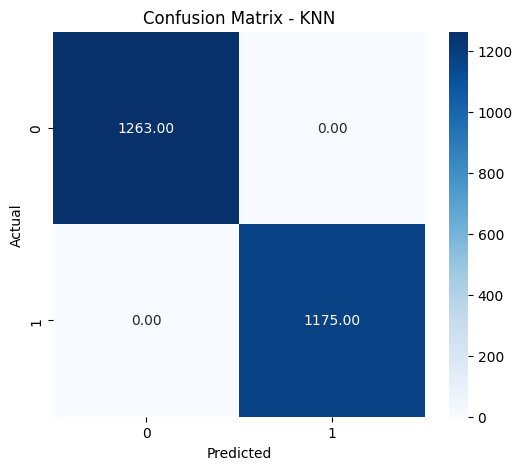

In [104]:
cmKNN = confusion_matrix(yTest, ypredKNN)

# Plotting the confusion matrix for KNN
plt.figure(figsize=(6, 5))
sns.heatmap(cmKNN, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - KNN")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tree Visualization

### Decision Tree

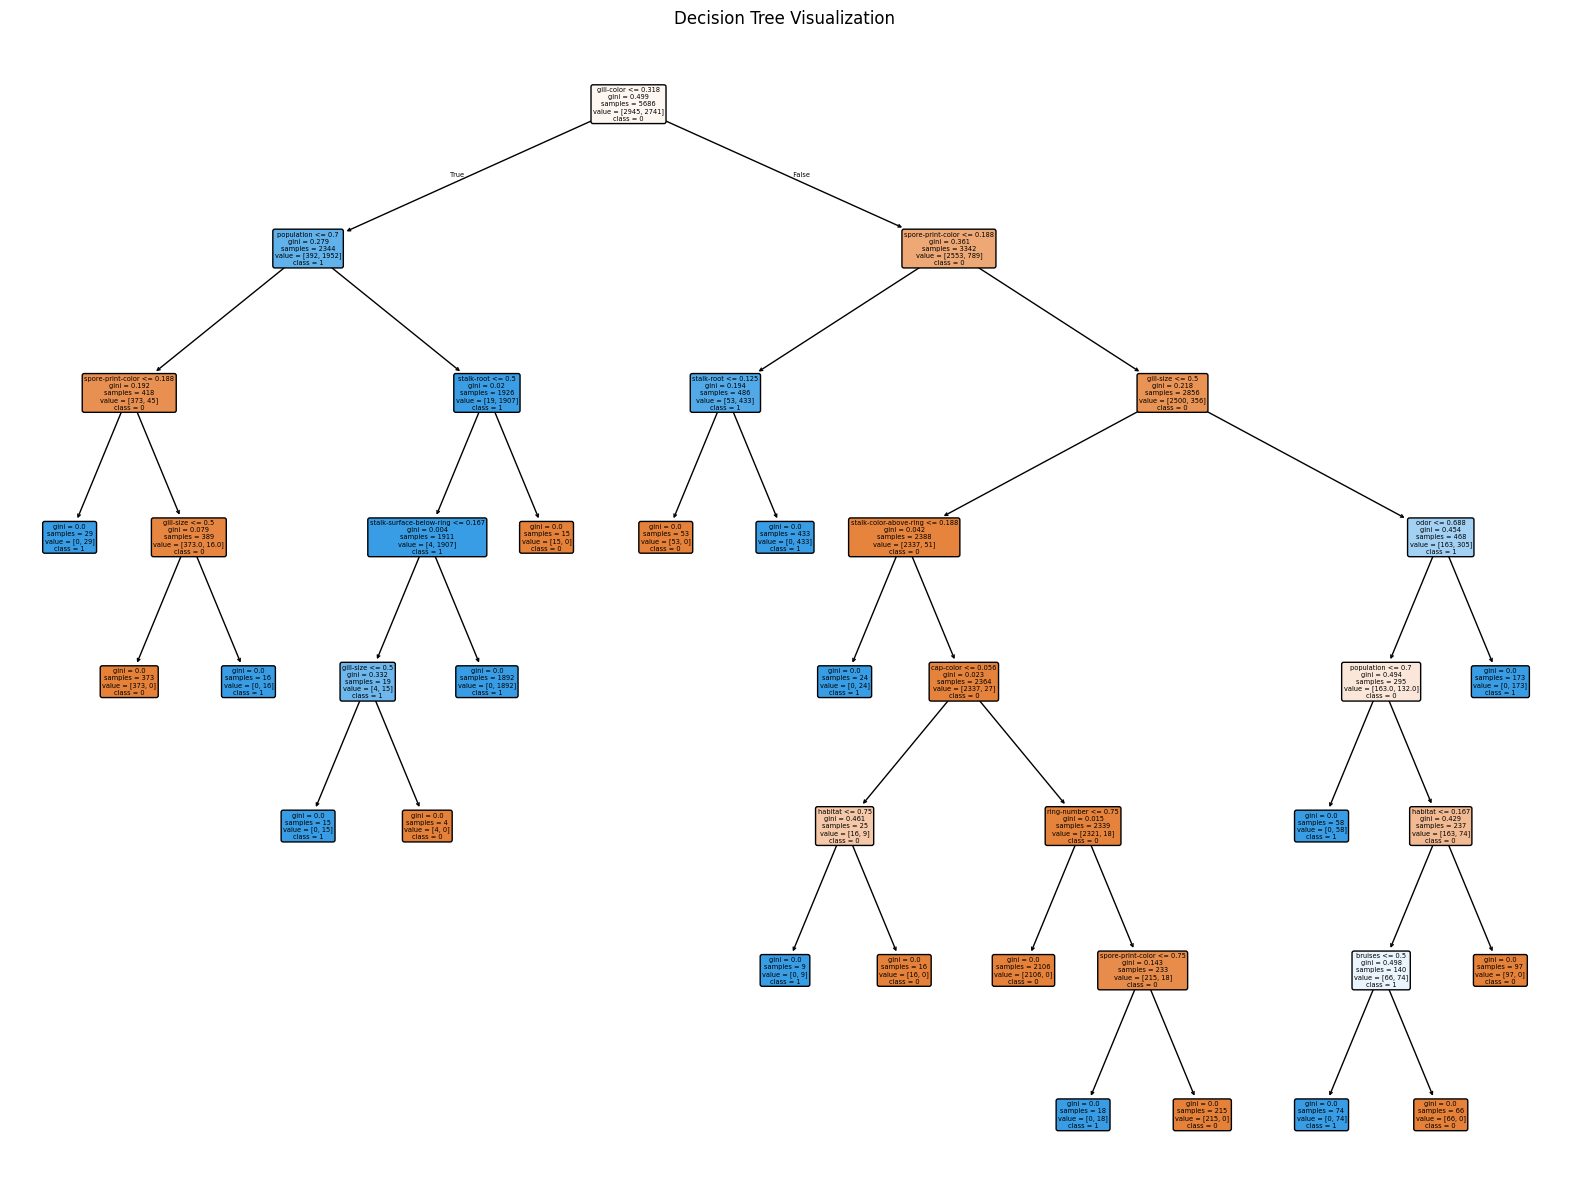

In [105]:
# Convert class labels to a list
classLabels = list(map(str, set(yTrain)))  # Ensure labels are strings

# Visualizing the Decision Tree
plt.figure(figsize=(20, 15))
plot_tree(
    modelDT,
    feature_names=xTrain.columns,
    class_names=classLabels,
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

### Random Forest

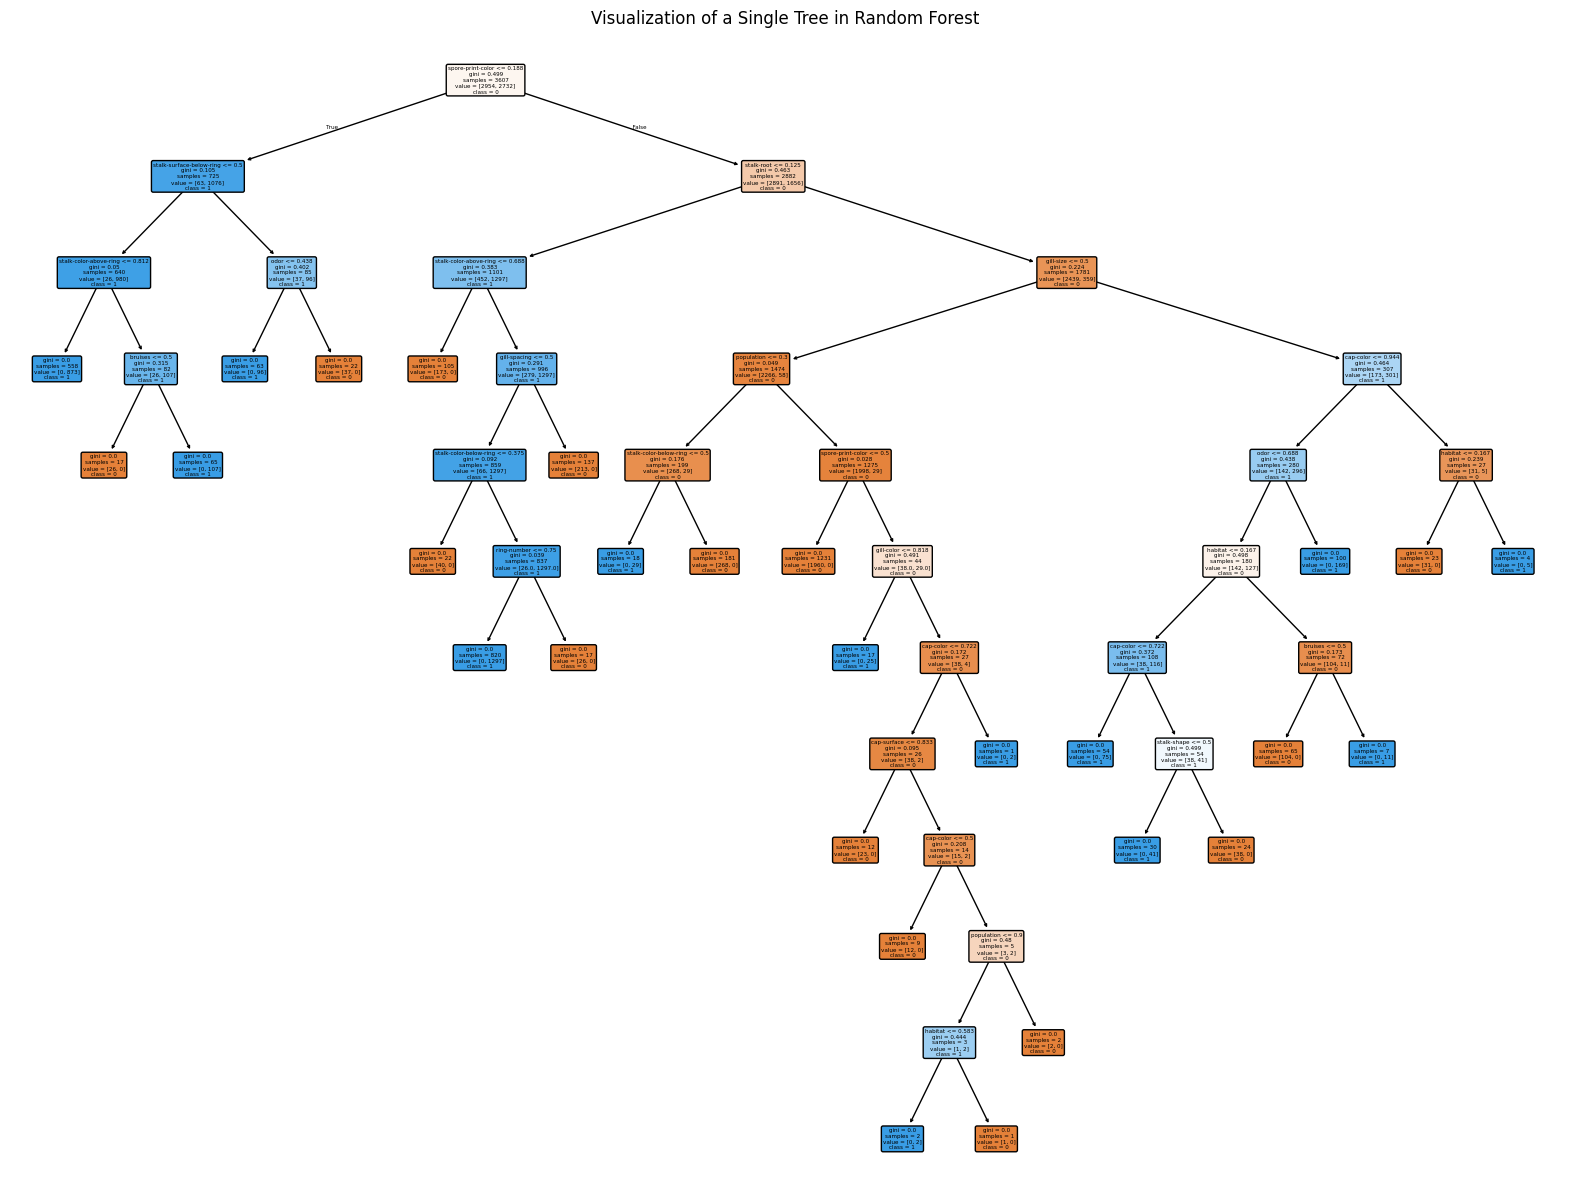

In [106]:
plt.figure(figsize=(20, 15))
plot_tree(
    modelRF.estimators_[0],
    feature_names=xTrain.columns,
    class_names=list(map(str, set(yTrain))),
    filled=True,
    rounded=True
)
plt.title("Visualization of a Single Tree in Random Forest")
plt.show()

## KNN

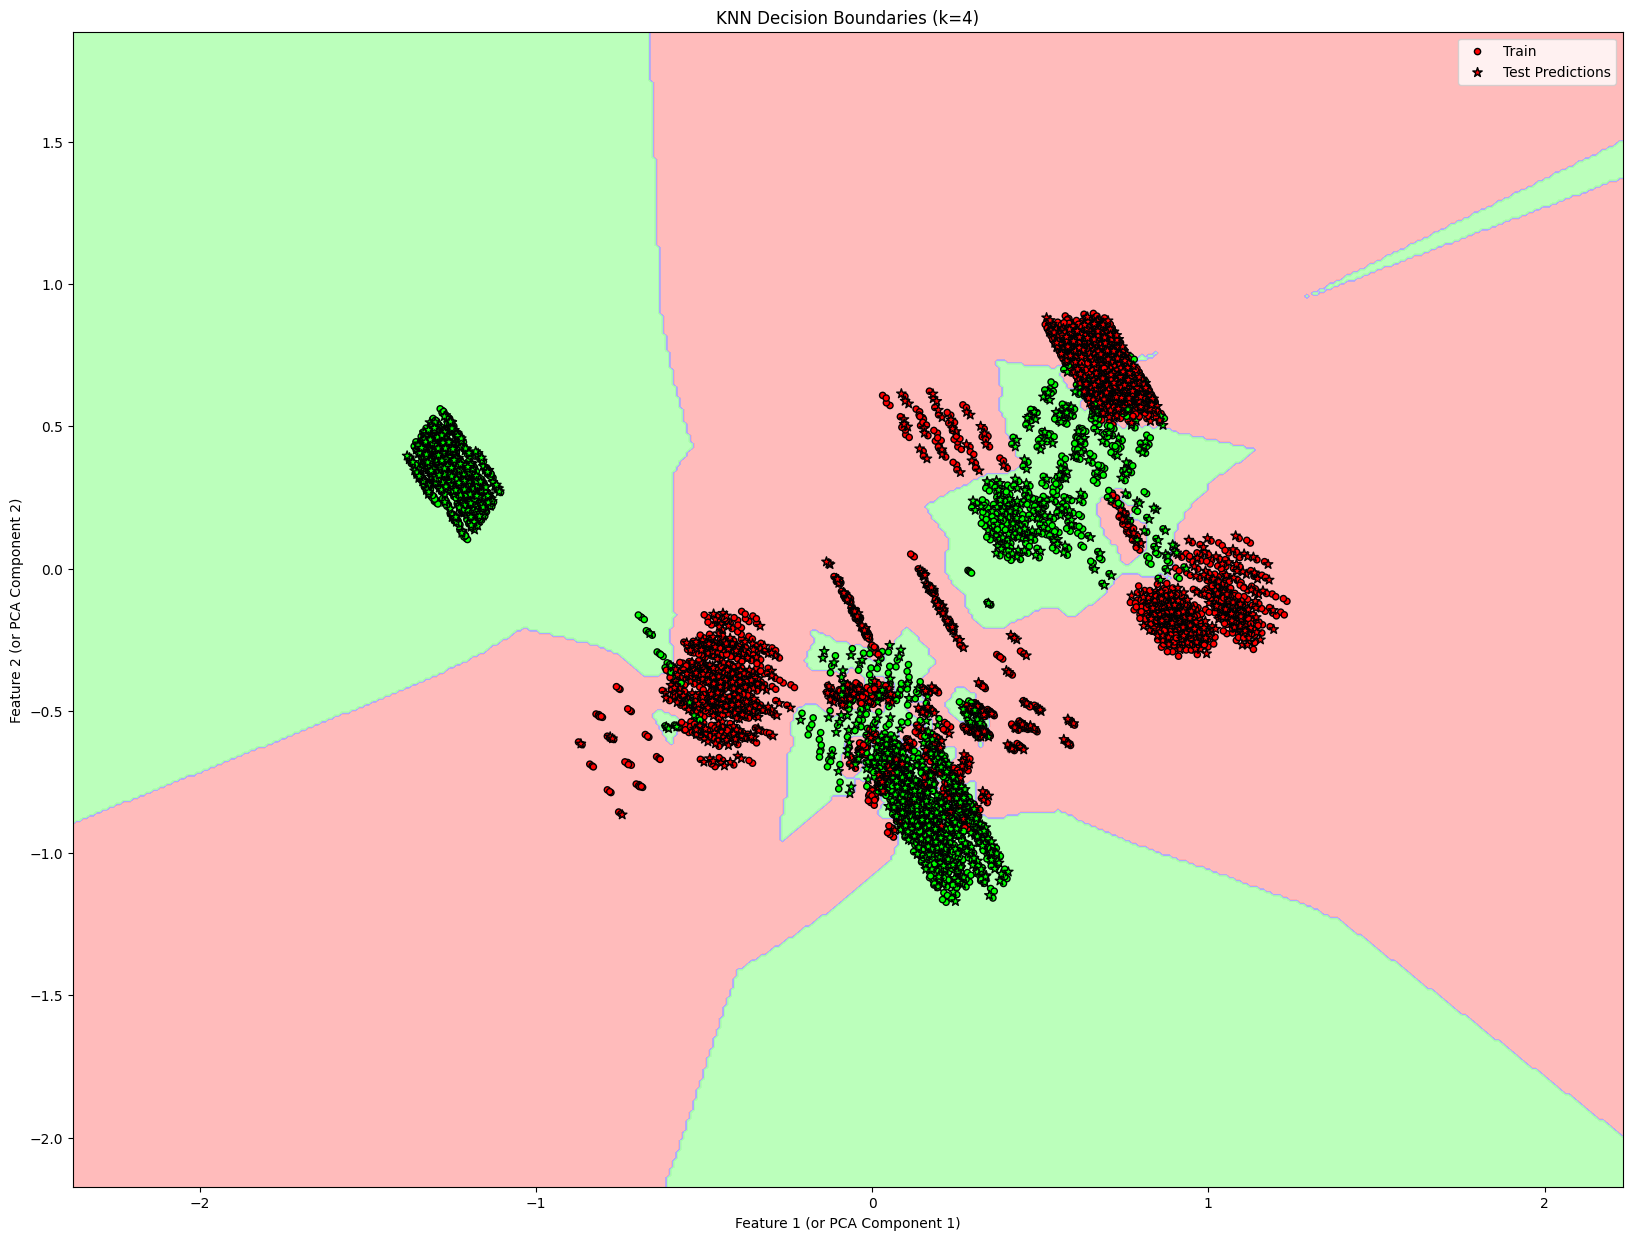

In [107]:
# Reduce data to 2 dimensions using PCA (if xTrain has more than 2 features)
if xTrain.shape[1] > 2:
    pca = PCA(n_components=2)
    xTrain_2D = pca.fit_transform(xTrain)
    xTest_2D = pca.transform(xTest)
else:
    xTrain_2D = xTrain
    xTest_2D = xTest

# Train KNN on reduced 2D data
modelKNN_2D = KNeighborsClassifier(n_neighbors=k)
modelKNN_2D.fit(xTrain_2D, yTrain)

# Create mesh grid for plotting decision boundaries
x_min, x_max = xTrain_2D[:, 0].min() - 1, xTrain_2D[:, 0].max() + 1
y_min, y_max = xTrain_2D[:, 1].min() - 1, xTrain_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict for each point in the grid
Z = modelKNN_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(20, 15))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

# Plot training and test points
plt.scatter(xTrain_2D[:, 0], xTrain_2D[:, 1], c=yTrain, cmap=cmap_bold, edgecolor='k', s=20, label="Train")
plt.scatter(xTest_2D[:, 0], xTest_2D[:, 1], c=ypredKNN, cmap=cmap_bold, edgecolor='k', s=50, marker='*', label="Test Predictions")

plt.title(f"KNN Decision Boundaries (k={k})")
plt.xlabel("Feature 1 (or PCA Component 1)")
plt.ylabel("Feature 2 (or PCA Component 2)")
plt.legend()
plt.show()